#### Author: Ernie Sumoso


In [2]:
# !pip install ucimlrepo

## Part 0. Acquiring and pre-processing target feature

In [82]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
 
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets

In [83]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [84]:
y = y.replace('<=50K.', '<=50K')
y = y.replace('>50K.', '>50K')
y['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [85]:
y = y.replace('<=50K', '0')
y = y.replace('>50K', '1')
y['income'] = y['income'].astype(int)
y['income'].unique()

array([0, 1])

## Part 1: ML Models using only Numerical Features

In [86]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

x_numeric = x.select_dtypes(include = numeric_types)
x_numeric

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48837,39,215419,13,0,0,36
48838,64,321403,9,0,0,40
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# function to train a model
def train_model(model, x_train, y_train, x_test):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test, avg='weighted'):
    print(f"Acuracy Score - Train Subset: {accuracy_score(y_train, y_pred_train)*100:.2f}%")
    print(f"Acuracy Score - Test Subset: {accuracy_score(y_test, y_pred_test)*100:.2f}%")
    print(f"F1 Score - Train Subset: {f1_score(y_train, y_pred_train, average=avg):.4f}")
    print(f"F1 Score - Test Subset: {f1_score(y_test, y_pred_test, average=avg):.4f}", end='\n\n')

# function to plot a confusion matrix based on prediction results
def plot_confusion_matrix(y_test, y_pred_test, labels=[]):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred_test)
    df = pd.DataFrame(matrix, columns=labels)
    df.index = labels
    
    # plot the heatmap and set labels
    sns.heatmap(df, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

linr = LinearRegression()
logr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

LogisticRegression(max_iter=1000, random_state=42)

Acuracy Score - Train Subset: 81.64%
Acuracy Score - Test Subset: 81.12%
F1 Score - Train Subset: 0.7954
F1 Score - Test Subset: 0.7907



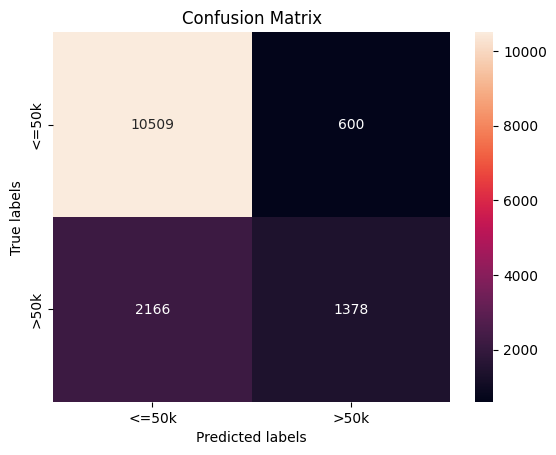

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(logr, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

DecisionTreeClassifier(random_state=42)

Acuracy Score - Train Subset: 99.89%
Acuracy Score - Test Subset: 77.32%
F1 Score - Train Subset: 0.9989
F1 Score - Test Subset: 0.7737



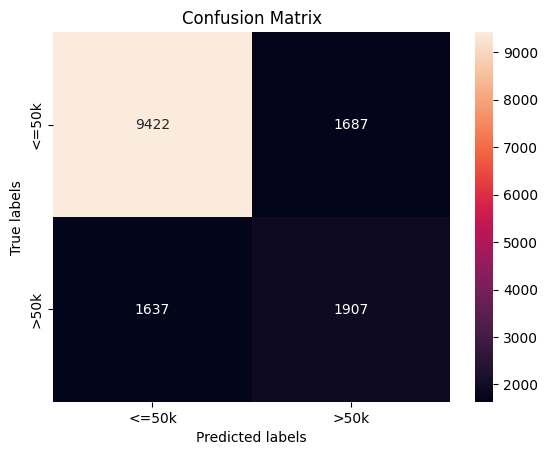

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(dt, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

RandomForestClassifier(random_state=42)

Acuracy Score - Train Subset: 99.89%
Acuracy Score - Test Subset: 80.76%
F1 Score - Train Subset: 0.9989
F1 Score - Test Subset: 0.8012



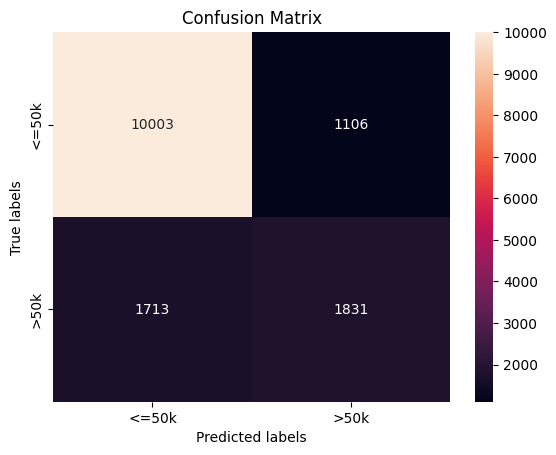

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(rf, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

KNeighborsClassifier()

Acuracy Score - Train Subset: 83.46%
Acuracy Score - Test Subset: 77.94%
F1 Score - Train Subset: 0.8184
F1 Score - Test Subset: 0.7553



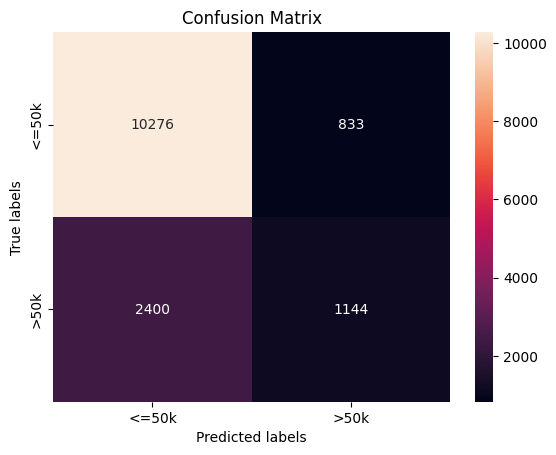

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(knn, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

SVC(random_state=42)

Acuracy Score - Train Subset: 79.84%
Acuracy Score - Test Subset: 79.57%
F1 Score - Train Subset: 0.7378
F1 Score - Test Subset: 0.7344



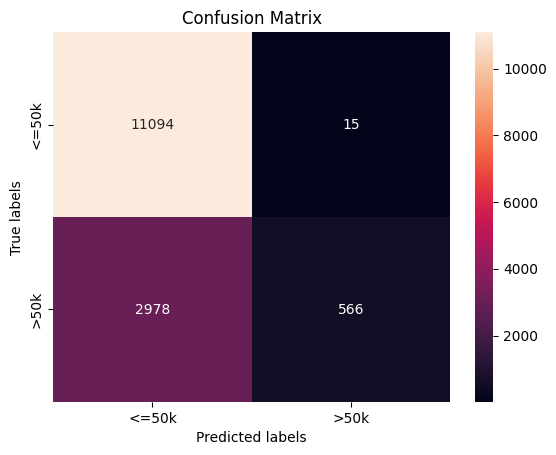

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(svm, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

## Part 2 - One-Hot Encoding Categorical Columns and training ML Models

In [116]:
df_categorical = x.select_dtypes(exclude=numeric_types)
df_categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States


In [117]:
categorical_columns = df_categorical.columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [123]:
x_categorical = pd.get_dummies(x, columns = categorical_columns, dtype=int)
x_categorical

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,64,321403,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,374983,13,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,83891,13,5455,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
# Initializing ML Models
logr = LogisticRegression(max_iter=15000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

D:\Anaconda\envs\env0\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=15000, random_state=42)

Acuracy Score - Train Subset: 85.27%
Acuracy Score - Test Subset: 84.82%
F1 Score - Train Subset: 0.8471
F1 Score - Test Subset: 0.8412



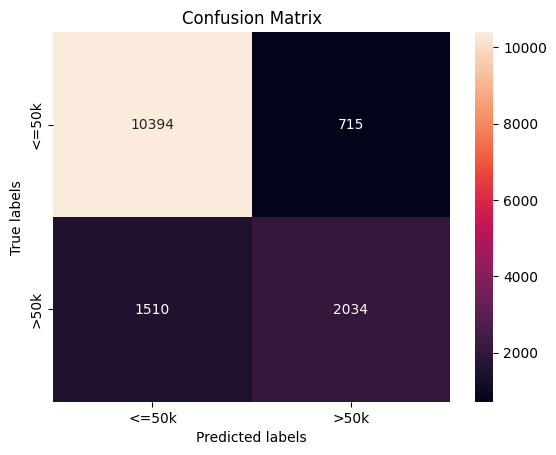

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(logr, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

DecisionTreeClassifier(random_state=42)

Acuracy Score - Train Subset: 99.99%
Acuracy Score - Test Subset: 81.40%
F1 Score - Train Subset: 0.9999
F1 Score - Test Subset: 0.8152



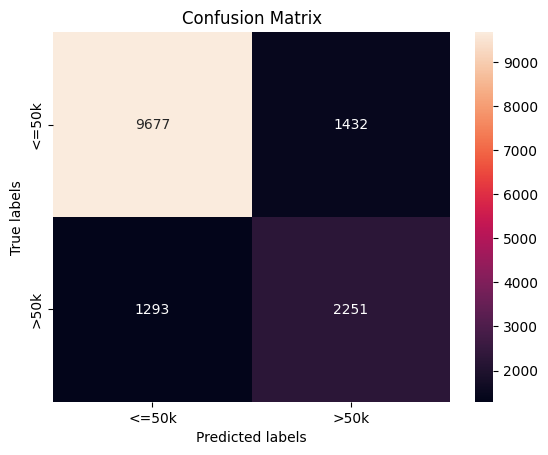

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(dt, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

RandomForestClassifier(random_state=42)

Acuracy Score - Train Subset: 99.99%
Acuracy Score - Test Subset: 85.20%
F1 Score - Train Subset: 0.9999
F1 Score - Test Subset: 0.8476



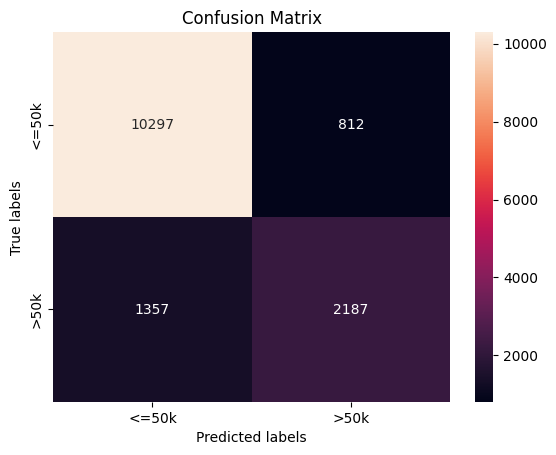

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(rf, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

KNeighborsClassifier()

Acuracy Score - Train Subset: 83.49%
Acuracy Score - Test Subset: 77.93%
F1 Score - Train Subset: 0.8188
F1 Score - Test Subset: 0.7554



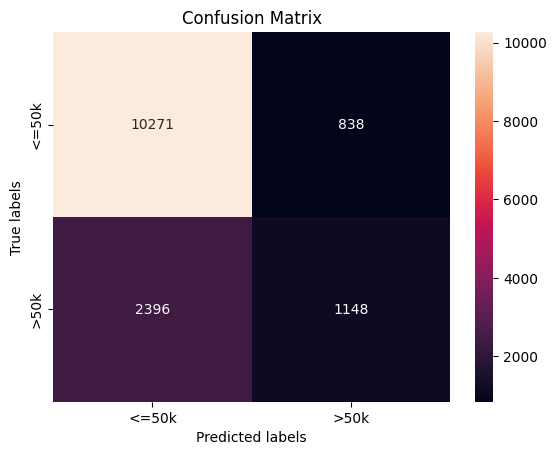

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(knn, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

SVC(random_state=42)

Acuracy Score - Train Subset: 79.80%
Acuracy Score - Test Subset: 79.51%
F1 Score - Train Subset: 0.7367
F1 Score - Test Subset: 0.7332



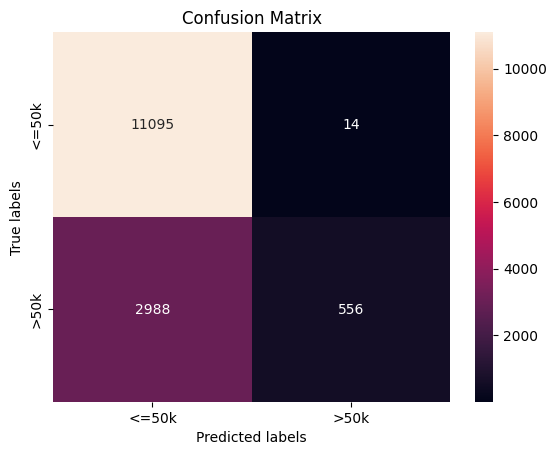

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(svm, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

## Part 3 - Apply PCA on dataset, reducing to 6 components, then training ML models again

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
features_pca = pca.fit_transform(x_categorical)
display(pca)

PCA(n_components=6)

In [148]:
features_pca.shape

(48842, 6)

In [149]:
# Initializing ML Models
logr = LogisticRegression(max_iter=15000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

LogisticRegression(max_iter=15000, random_state=42)

Acuracy Score - Train Subset: 81.62%
Acuracy Score - Test Subset: 81.17%
F1 Score - Train Subset: 0.7954
F1 Score - Test Subset: 0.7912



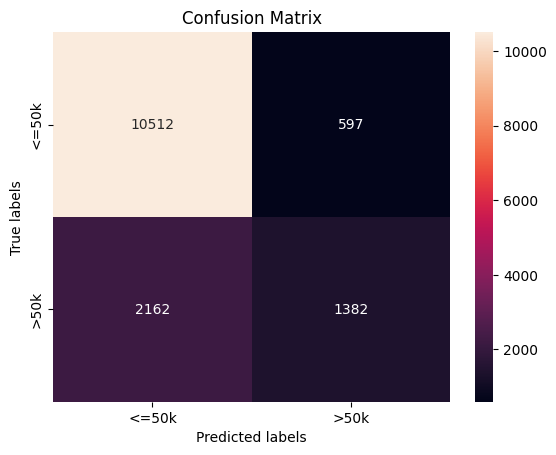

In [150]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(logr, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

DecisionTreeClassifier(random_state=42)

Acuracy Score - Train Subset: 99.99%
Acuracy Score - Test Subset: 77.06%
F1 Score - Train Subset: 0.9999
F1 Score - Test Subset: 0.7714



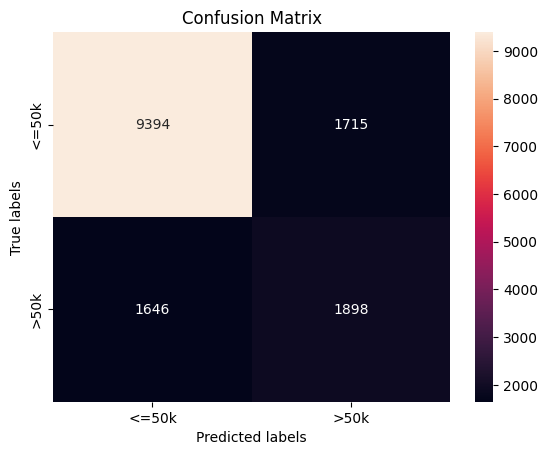

In [151]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(dt, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

RandomForestClassifier(random_state=42)

Acuracy Score - Train Subset: 99.99%
Acuracy Score - Test Subset: 82.36%
F1 Score - Train Subset: 0.9999
F1 Score - Test Subset: 0.8107



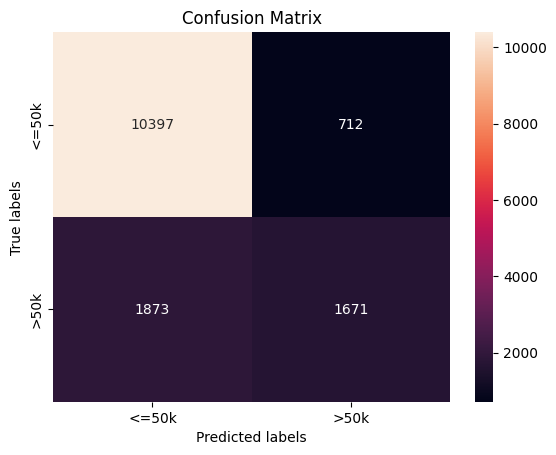

In [152]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(rf, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

KNeighborsClassifier()

Acuracy Score - Train Subset: 83.47%
Acuracy Score - Test Subset: 77.92%
F1 Score - Train Subset: 0.8185
F1 Score - Test Subset: 0.7553



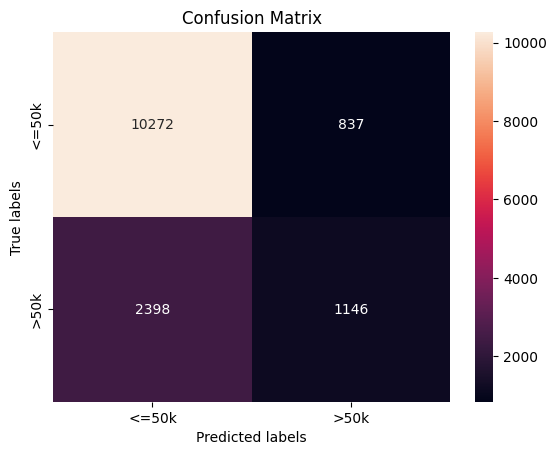

In [153]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(knn, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])

SVC(random_state=42)

Acuracy Score - Train Subset: 80.02%
Acuracy Score - Test Subset: 79.77%
F1 Score - Train Subset: 0.7457
F1 Score - Test Subset: 0.7415



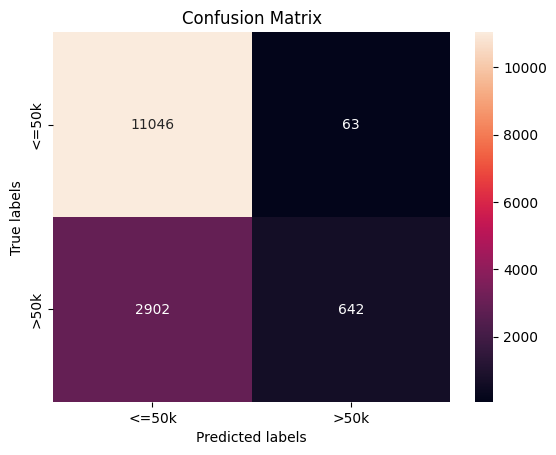

In [154]:
x_train, x_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.3, random_state=42)
y_train_pred, y_test_pred = train_model(svm, x_train, y_train['income'], x_test)
display_classifier_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_confusion_matrix(y_test, y_test_pred, labels=['<=50k', '>50k'])